# **Regressão**

## Importando bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
from sklearn import linear_model as lm
from sklearn import tree as tr
from sklearn import ensemble as en
from sklearn import preprocessing as pp
from matplotlib import pyplot as plt

## Carregando dados:

In [2]:
X_train = pd.read_csv('../X_training.csv')
y_train = pd.read_csv('../y_training.csv')
X_teste = pd.read_csv('../X_test.csv')
y_teste = pd.read_csv('../y_test.csv')
X_val = pd.read_csv('../X_validation.csv')
y_val = pd.read_csv('../y_validation.csv')

## Funções:

In [3]:
def error(data_type, model_name, y, yhat):
    r2 = mt.r2_score(y, yhat)
    mse = mt.mean_squared_error(y, yhat)
    rmse = np.sqrt(mt.mean_squared_error(y, yhat))
    mae = mt.mean_absolute_error(y, yhat)
    mape = mt.mean_absolute_percentage_error(y, yhat)
        
    return pd.DataFrame({'Data Type': data_type,
                        'Model Name': model_name,
                        'R2': r2,
                        'MSE': mse,
                        'RMSE': rmse,
                        'MAE': mae,
                        'MAPE': mape}, index=[1])

# **1.0 Linear Regression**

In [4]:
# sobre os dados de treinamento:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_train)

linear_error_y_pred = error('Training', 'Linear Regression', y_train, y_pred)

# sobre os dados de validacao:
y_pred_val = lr_model.predict(X_val)

linear_error_y_pred_val = error('Validation', 'Linear Regression', y_val, y_pred_val)

# sobre os dados de teste:
lr_model.fit(np.concatenate((X_train, X_val)),
             np.concatenate((y_train, y_val)))
y_pred_teste = lr_model.predict(X_teste)

linear_error_y_pred_teste = error('Test', 'Linear Regression', y_teste, y_pred_teste)


result_linear = pd.concat([linear_error_y_pred, linear_error_y_pred_val, linear_error_y_pred_teste], ignore_index=True).round(3)
result_linear

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,Linear Regression,0.046,455.996,21.354,16.998,8.653
1,Validation,Linear Regression,0.040,458.447,21.411,17.040,8.683
2,Test,Linear Regression,0.051,461.988,21.494,17.144,8.531


# **2.0 Regularização Lasso, Ridge e ElasticNet**

### 2.1 Lasso

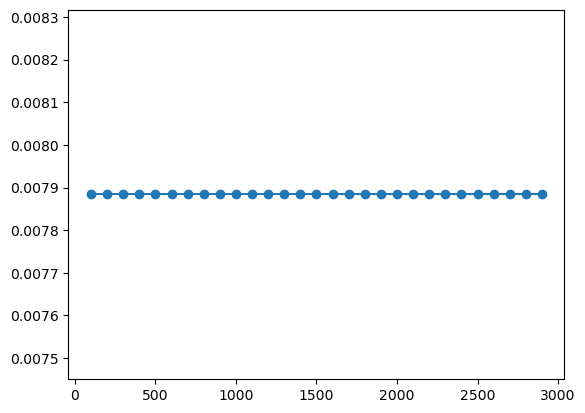

In [8]:
values = np.arange(100, 3000, 100)
val_score = []

for i in values:
    lasso = lm.Lasso(max_iter=i)
    lasso.fit(X_train, y_train)
    y_pred_val = lasso.predict(X_val)
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

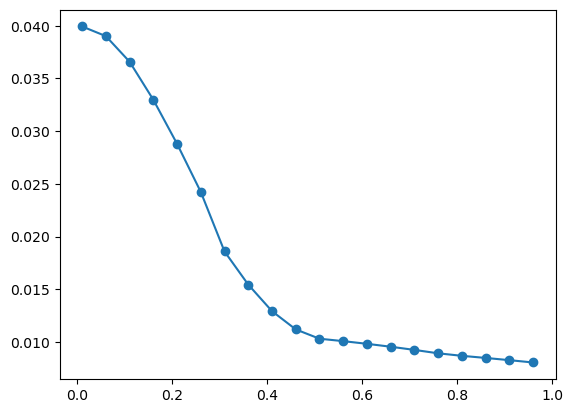

In [68]:
values = np.arange(0.01, 1.0, 0.05)
val_score = []

for i in values:
    lasso = lm.Lasso(alpha=i, max_iter=1000)
    lasso.fit(X_train, y_train)
    y_pred_val = lasso.predict(X_val)   
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

In [5]:
# sobre dados de treinamento:
lasso = lm.Lasso(alpha=0.01, max_iter=1000)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_train)

lasso_error_y_pred = error('Training', 'Lasso', y_train, y_pred)

# sobre dados de validacao:
y_pred_val = lasso.predict(X_val)

lasso_error_y_pred_val = error('Validation', 'Lasso', y_val, y_pred_val)

# sobre dados de teste:
lasso.fit(np.concatenate((X_train, X_val)),
          np.concatenate((y_train, y_val)))
y_pred_teste = lasso.predict(X_teste)

lasso_error_y_pred_teste = error('Test', 'Lasso', y_teste, y_pred_teste)


result_lasso = pd.concat([lasso_error_y_pred, lasso_error_y_pred_val, lasso_error_y_pred_teste], ignore_index=True).round(3)
result_lasso

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,Lasso,0.046,456.057,21.356,17.002,8.661
1,Validation,Lasso,0.040,458.445,21.411,17.038,8.686
2,Test,Lasso,0.051,462.167,21.498,17.145,8.549


### 2.2 Ridge

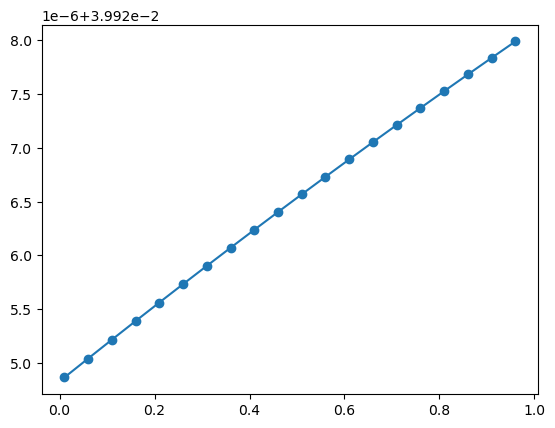

In [12]:
values = np.arange(0.01, 1.0, 0.05)
val_score = []

for i in values:
    ridge = lm.Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    y_pred_val = ridge.predict(X_val)
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

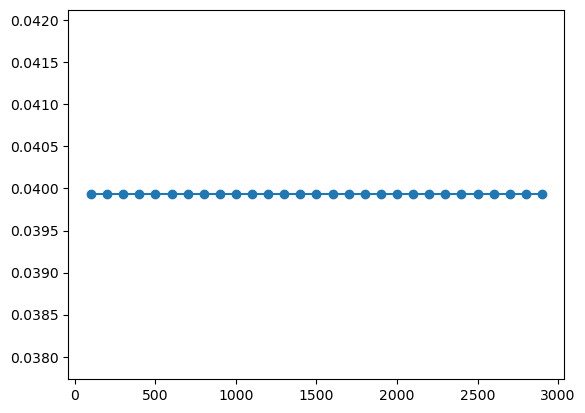

In [8]:
values = np.arange(100, 3000, 100)
val_score = []

for i in values:
    ridge = lm.Ridge(max_iter=i, alpha=1.0)
    ridge.fit(X_train, y_train)
    y_pred_val = ridge.predict(X_val)   
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

In [21]:
# sobre dados de treinamento:
ridge = lm.Ridge(alpha=1.0, max_iter=1000)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_train)

ridge_error_y_pred = error('Training', 'Ridge', y_train, y_pred)

# sobre dados de validacao:
y_pred_val = ridge.predict(X_val)

ridge_error_y_pred_val = error('Validation', 'Ridge', y_val, y_pred_val)

# sobre dados de teste:
ridge.fit(np.concatenate((X_train, X_val)),
          np.concatenate((y_train, y_val)))
y_pred_teste = ridge.predict(X_teste)

ridge_error_y_pred_teste = error('Test', 'Ridge', y_teste, y_pred_teste)


result_ridge = pd.concat([ridge_error_y_pred, ridge_error_y_pred_val, ridge_error_y_pred_teste], ignore_index=True).round(3)
result_ridge

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,Ridge,0.046,455.996,21.354,16.998,8.653
1,Validation,Ridge,0.040,458.445,21.411,17.039,8.682
2,Test,Ridge,0.051,461.988,21.494,17.144,8.532


### 2.3 ElasticNet

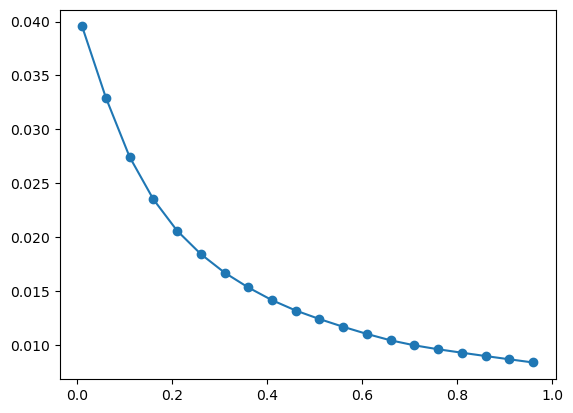

In [35]:
values = np.arange(0.01, 1.0, 0.05)
val_score = []

for i in values:
    elastic_net = lm.ElasticNet(alpha=i)
    elastic_net.fit(X_train, y_train)
    y_pred_val = elastic_net.predict(X_val)
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

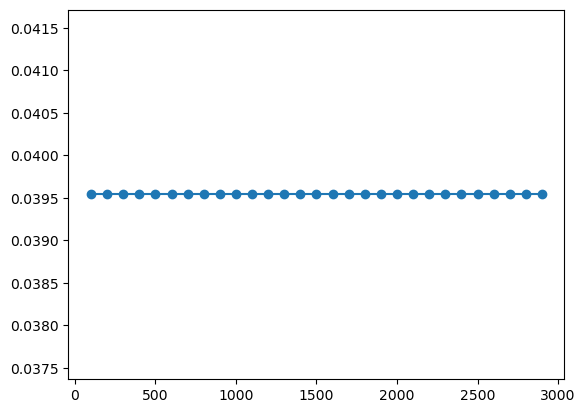

In [31]:
values = np.arange(100, 3000, 100)
val_score = []

for i in values:
    elastic_net = lm.ElasticNet(max_iter=i, alpha=0.01)
    elastic_net.fit(X_train, y_train)
    y_pred_val = elastic_net.predict(X_val)   
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

In [7]:
# sobre dados de treinamento:
elastic_net = lm.ElasticNet(alpha=0.01, max_iter=1000)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_train)

elastic_error_y_pred = error('Training', 'ElasticNet', y_train, y_pred)

# sobre dados de validacao:
y_pred_val = elastic_net.predict(X_val)

elastic_error_y_pred_val = error('Validation', 'ElasticNet', y_val, y_pred_val)

# sobre dados de teste:
elastic_net.fit(np.concatenate((X_train, X_val)),
                np.concatenate((y_train, y_val)))
y_pred_teste = elastic_net.predict(X_teste)

elastic_error_y_pred_teste = error('Test', 'ElasticNet', y_teste, y_pred_teste)


result_elastic = pd.concat([elastic_error_y_pred, elastic_error_y_pred_val, elastic_error_y_pred_teste], ignore_index=True).round(3)
result_elastic

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,ElasticNet,0.045,456.476,21.365,17.009,8.663
1,Validation,ElasticNet,0.040,458.632,21.416,17.034,8.679
2,Test,ElasticNet,0.049,462.805,21.513,17.147,8.572


# **3.0 Decision Tree Regressor**

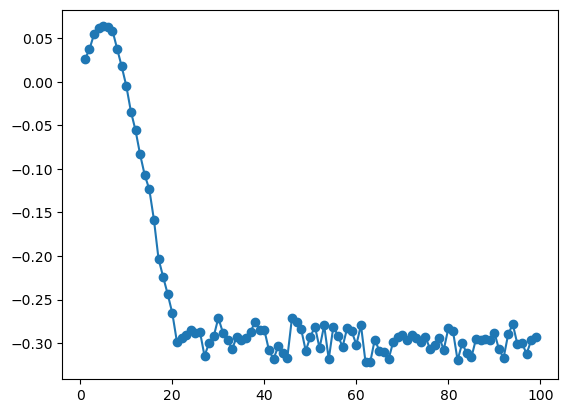

In [22]:
values = np.arange(1, 100, 1)
val_score = []

for i in values:
    tree_reg = tr.DecisionTreeRegressor(max_depth=i, random_state=0)
    tree_reg.fit(X_train, y_train)
    y_pred_val = tree_reg.predict(X_val)  
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

In [24]:
depth = val_score.index(max(val_score))
depth

4

In [8]:
# sobre dados de treinamento:
tree_reg = tr.DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_train)

tree_error_y_pred = error('Training', 'Decision Tree', y_train, y_pred)

# sobre dados de validacao:
y_pred_val = tree_reg.predict(X_val)

tree_error_y_pred_val = error('Validation', 'Decision Tree', y_val, y_pred_val)

# sobre dados de teste:
tree_reg.fit(np.concatenate((X_train, X_val)),
             np.concatenate((y_train, y_val)))
y_pred_teste = tree_reg.predict(X_teste)

tree_error_y_pred_teste = error('Test', 'Decision Tree', y_teste, y_pred_teste)


result_tree = pd.concat([tree_error_y_pred, tree_error_y_pred_val, tree_error_y_pred_teste], ignore_index=True).round(3)
result_tree

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,Decision Tree,0.087,436.593,20.895,16.618,8.269
1,Validation,Decision Tree,0.062,447.826,21.162,16.849,8.536
2,Test,Decision Tree,0.065,455.229,21.336,17.033,8.129


# **4.0 Random Forest Regressor**

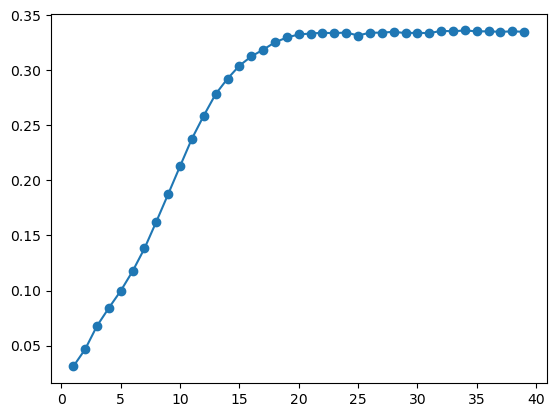

In [26]:
values = np.arange(1, 40, 1)
val_score = []

for i in values:
    random = en.RandomForestRegressor(max_depth=i, random_state=0)
    random.fit(X_train, y_train)
    y_pred_val = random.predict(X_val)  
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

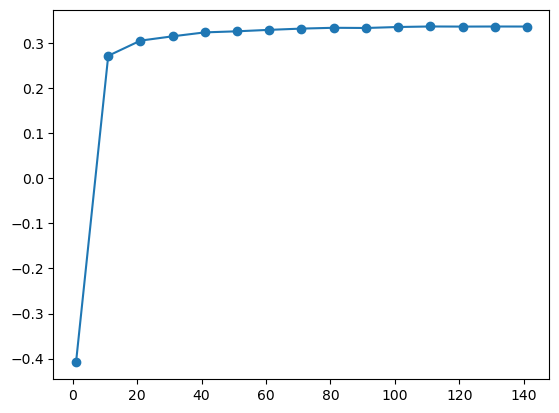

In [28]:
values = np.arange(1, 150, 10)
val_score = []

for i in values:
    random = en.RandomForestRegressor(n_estimators=i, random_state=0)
    random.fit(X_train, y_train)
    y_pred_val = random.predict(X_val)  
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

In [9]:
# sobre dados de treinamento:
random = en.RandomForestRegressor(max_depth=23, n_estimators=110, random_state=0)
random.fit(X_train, y_train)
y_pred = random.predict(X_train)

random_error_y_pred = error('Training', 'Random Forest', y_train, y_pred)

# sobre dados de validacao:
y_pred_val = random.predict(X_val)

random_error_y_pred_val = error('Validation', 'Random Forest', y_val, y_pred_val)

# sobre dados de teste:
random.fit(np.concatenate((X_train, X_val)),
           np.concatenate((y_train, y_val)))
y_pred_teste = random.predict(X_teste)

random_error_y_pred_teste = error('Test', 'Random Forest', y_teste, y_pred_teste)


result_random = pd.concat([random_error_y_pred, random_error_y_pred_val, random_error_y_pred_teste], ignore_index=True).round(3)
result_random

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,Random Forest,0.898,48.641,6.974,5.040,2.622
1,Validation,Random Forest,0.335,317.648,17.823,13.056,7.030
2,Test,Random Forest,0.402,291.026,17.059,12.354,6.336


# **5.0 Polynomial Regression**

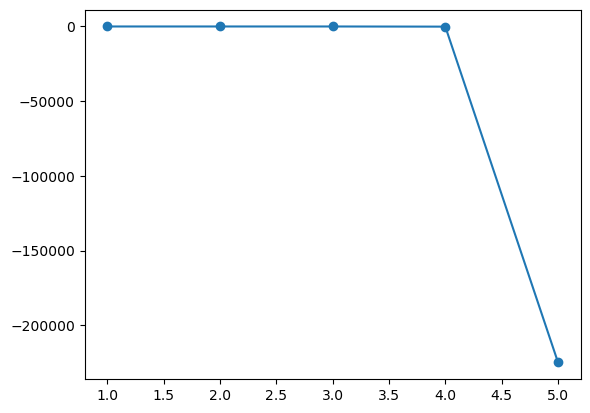

In [29]:
values = np.arange(1, 6, 1)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_train)
    model = lm.LinearRegression()
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val)
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');   

In [10]:
# sobre dados de treinamento:
poly = pp.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poli = lm.LinearRegression()
poli.fit(X_poly, y_train)
y_pred = poli.predict(X_poly)

poli_error_y_pred = error('Training', 'Polynomial', y_train, y_pred)

# sobre dados de validacao:
X_poly_val = poly.transform(X_val)
y_pred_val = poli.predict(X_poly_val)

poli_error_y_pred_val = error('Validation', 'Polynomial', y_val, y_pred_val)

# sobre dados de teste:
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))
X_poly_train_val = poly.fit_transform(X_train_val)
poli.fit(X_poly_train_val, y_train_val)
X_poly_teste = poly.transform(X_teste)
y_pred_teste = poli.predict(X_poly_teste)

poli_error_y_pred_teste = error('Test', 'Polynomial', y_teste, y_pred_teste)


result_poly = pd.concat([poli_error_y_pred, poli_error_y_pred_val, poli_error_y_pred_teste], ignore_index=True).round(3)
result_poly

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,Polynomial,0.094,432.986,20.808,16.458,8.351
1,Validation,Polynomial,0.066,445.768,21.113,16.750,8.548
2,Test,Polynomial,0.091,442.641,21.039,16.736,8.277


## 5.1 Polynomial Lasso

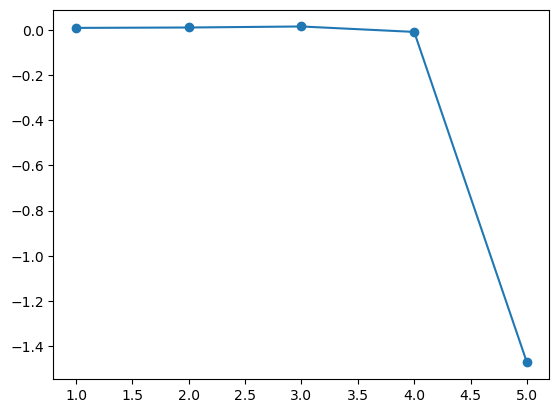

In [48]:
values = np.arange(1, 6, 1)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_train)
    model = lm.Lasso()
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val) 
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');   

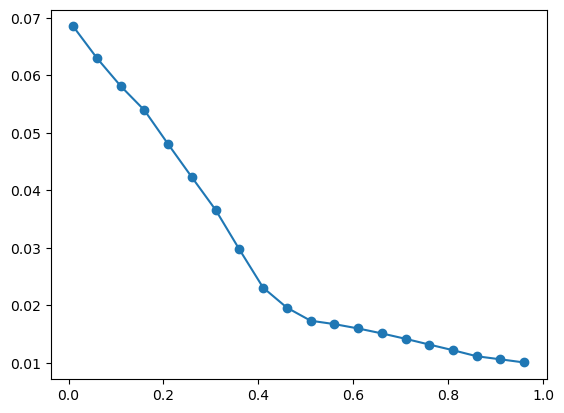

In [60]:
values = np.arange(0.01, 1.0, 0.05)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_train)
    model = lm.Lasso(alpha=i)
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val) 
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');   

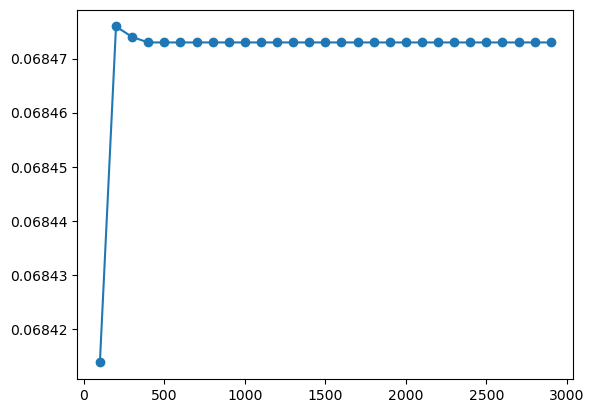

In [62]:
values = np.arange(100, 3000, 100)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_train)
    model = lm.Lasso(max_iter=i, alpha=0.01)
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val) 
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');  

In [11]:
# sobre dados de treinamento:
poly = pp.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poli = lm.Lasso(alpha=0.01, max_iter=1000)
poli.fit(X_poly, y_train)
y_pred = poli.predict(X_poly)

poli_lasso_error_y_pred = error('Training', 'Polynomial Lasso', y_train, y_pred)

# sobre dados de validacao:
X_poly_val = poly.transform(X_val)
y_pred_val = poli.predict(X_poly_val)

poli_lasso_error_y_pred_val = error('Validation', 'Polynomial Lasso', y_val, y_pred_val)

# sobre dados de teste:
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))
X_poly_train_val = poly.fit_transform(X_train_val)
poli.fit(X_poly_train_val, y_train_val)
X_poly_teste = poly.transform(X_teste)
y_pred_teste = poli.predict(X_poly_teste)

poli_lasso_error_y_pred_teste = error('Test', 'Polynomial Lasso', y_teste, y_pred_teste)


result_poly_lasso = pd.concat([poli_lasso_error_y_pred, poli_lasso_error_y_pred_val, poli_lasso_error_y_pred_teste], ignore_index=True).round(3)
result_poly_lasso

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,Polynomial Lasso,0.087,436.513,20.893,16.541,8.433
1,Validation,Polynomial Lasso,0.068,444.815,21.091,16.732,8.591
2,Test,Polynomial Lasso,0.085,445.332,21.103,16.786,8.342


## 5.2 Polynomial Ridge

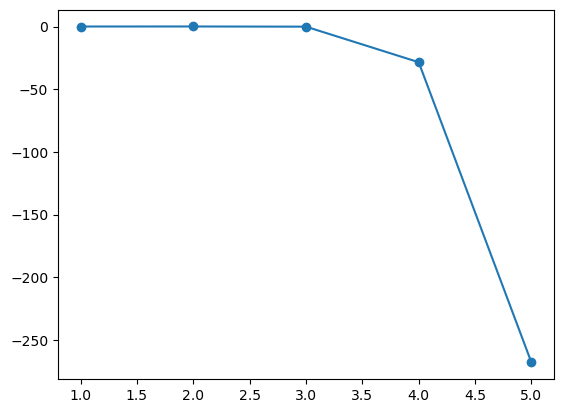

In [69]:
values = np.arange(1, 6, 1)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_train)
    model = lm.Ridge()
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val) 
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');  

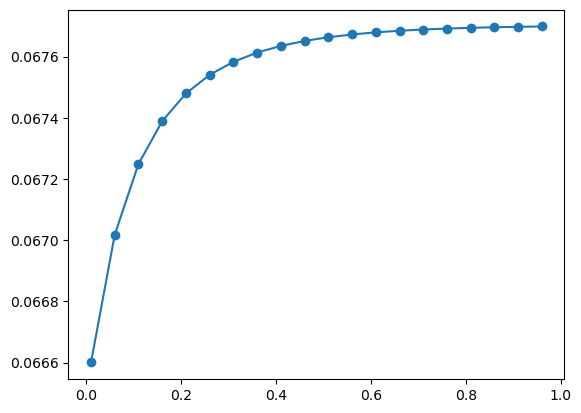

In [74]:
values = np.arange(0.01, 1.0, 0.05)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_train)
    model = lm.Ridge(alpha=i)
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val) 
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao'); 

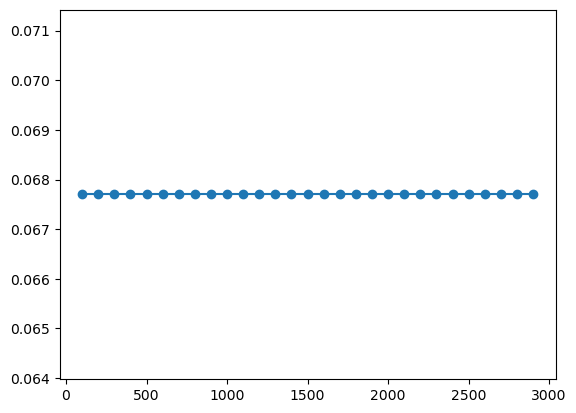

In [84]:
values = np.arange(100, 3000, 100)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_train)
    model = lm.Ridge(max_iter=i, alpha=0.99)
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val) 
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

In [12]:
# sobre dados de treinamento:
poly = pp.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poli = lm.Ridge(alpha=0.99, max_iter=1000)
poli.fit(X_poly, y_train)
y_pred = poli.predict(X_poly)

poli_ridge_error_y_pred = error('Training', 'Polynomial Ridge', y_train, y_pred)

# sobre dados de validacao:
X_poly_val = poly.transform(X_val)
y_pred_val = poli.predict(X_poly_val)

poli_ridge_error_y_pred_val = error('Validation', 'Polynomial Ridge', y_val, y_pred_val)

# sobre dados de teste:
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))
X_poly_train_val = poly.fit_transform(X_train_val)
poli.fit(X_poly_train_val, y_train_val)
X_poly_teste = poly.transform(X_teste)
y_pred_teste = poli.predict(X_poly_teste)

poli_ridge_error_y_pred_teste = error('Test', 'Polynomial Ridge', y_teste, y_pred_teste)


result_poly_ridge = pd.concat([poli_ridge_error_y_pred, poli_ridge_error_y_pred_val, poli_ridge_error_y_pred_teste], ignore_index=True).round(3)
result_poly_ridge

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,Polynomial Ridge,0.093,433.472,20.820,16.472,8.373
1,Validation,Polynomial Ridge,0.068,445.184,21.099,16.739,8.569
2,Test,Polynomial Ridge,0.090,442.964,21.047,16.742,8.308


## 5.3 Polynomial ElasticNet

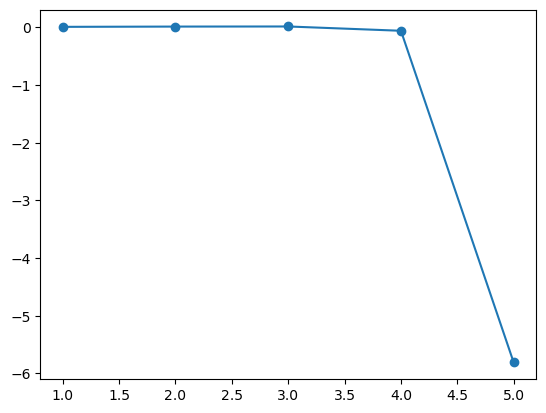

In [98]:
values = np.arange(1, 6, 1)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_train)
    model = lm.ElasticNet()
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val) 
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');  

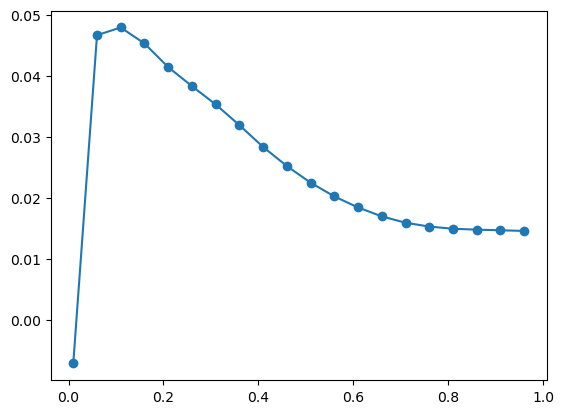

In [100]:
values = np.arange(0.01, 1.0, 0.05)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X_train)
    model = lm.ElasticNet(alpha=i)
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val) 
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao'); 

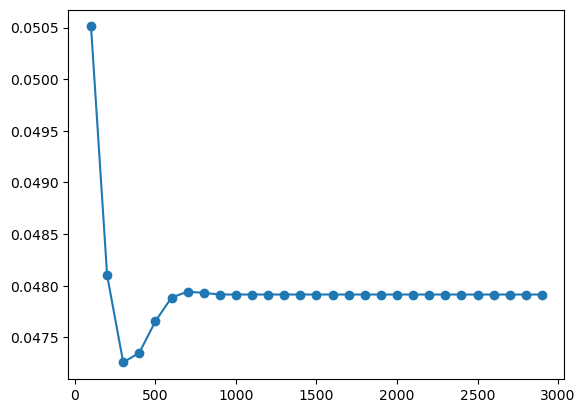

In [103]:
values = np.arange(100, 3000, 100)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X_train)
    model = lm.ElasticNet(max_iter=i, alpha=0.11)
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val) 
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

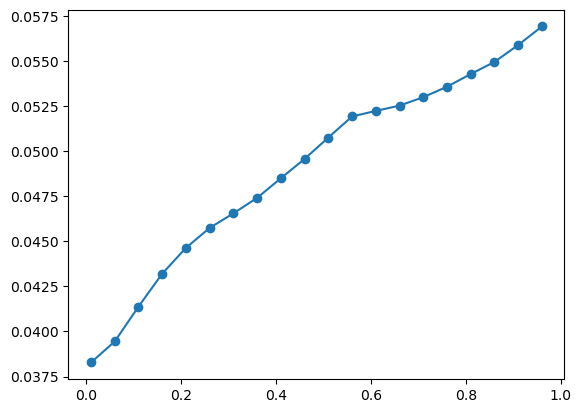

In [13]:
values = np.arange(0.01, 1.00, 0.05)
val_score = []

for i in values:
    poly = pp.PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X_train)
    model = lm.ElasticNet(l1_ratio=i ,max_iter=100, alpha=0.11)
    model.fit(X_poly, y_train)
    X_poly_val = poly.transform(X_val)
    y_pred_val = model.predict(X_poly_val) 
    r2_val = mt.r2_score(y_val, y_pred_val)
    val_score.append(r2_val)

plt.plot(values, val_score, '-o', label='Validacao');

In [18]:
# sobre dados de treinamento:
poly = pp.PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
poli = lm.ElasticNet(alpha=0.11, max_iter=100, l1_ratio=0.96)
poli.fit(X_poly, y_train)
y_pred = poli.predict(X_poly)

poli_elast_error_y_pred = error('Training', 'Polynomial ElasticNet', y_train, y_pred)

# sobre dados de validacao:
X_poly_val = poly.transform(X_val)
y_pred_val = poli.predict(X_poly_val)

poli_elast_error_y_pred_val = error('Validation', 'Polynomial ElasticNet', y_val, y_pred_val)

# sobre dados de teste:
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))
X_poly_train_val = poly.fit_transform(X_train_val)
poli.fit(X_poly_train_val, y_train_val)
X_poly_teste = poly.transform(X_teste)
y_pred_teste = poli.predict(X_poly_teste)

poli_elast_error_y_pred_teste = error('Test', 'Polynomial ElasticNet', y_teste, y_pred_teste)


result_poly_elast = pd.concat([poli_elast_error_y_pred, poli_elast_error_y_pred_val, poli_elast_error_y_pred_teste], ignore_index=True).round(3)
result_poly_elast

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,Polynomial ElasticNet,0.073,443.076,21.049,16.669,8.491
1,Validation,Polynomial ElasticNet,0.057,450.340,21.221,16.828,8.636
2,Test,Polynomial ElasticNet,0.073,451.567,21.250,16.874,8.476


# **Regressão - Resultado final:**

In [22]:
training = pd.concat([linear_error_y_pred, lasso_error_y_pred, ridge_error_y_pred, elastic_error_y_pred, tree_error_y_pred, random_error_y_pred, poli_error_y_pred, poli_lasso_error_y_pred, poli_ridge_error_y_pred, poli_elast_error_y_pred], ignore_index=True)
validation = pd.concat([linear_error_y_pred_val, lasso_error_y_pred_val, ridge_error_y_pred_val, elastic_error_y_pred_val, tree_error_y_pred_val, random_error_y_pred_val, poli_error_y_pred_val, poli_lasso_error_y_pred_val, poli_ridge_error_y_pred_val, poli_elast_error_y_pred_val], ignore_index=True)
test = pd.concat([linear_error_y_pred_teste, lasso_error_y_pred_teste, ridge_error_y_pred_teste, elastic_error_y_pred_teste, tree_error_y_pred_teste, random_error_y_pred_teste, poli_error_y_pred_teste, poli_lasso_error_y_pred_teste, poli_ridge_error_y_pred_teste, poli_elast_error_y_pred_teste], ignore_index=True)

result = pd.concat([training, validation, test], ignore_index=True).round(3)
result

,Data Type,Model Name,R2,MSE,RMSE,MAE,MAPE
0,Training,Linear Regression,0.046,455.996,21.354,16.998,8.653
1,Training,Lasso,0.046,456.057,21.356,17.002,8.661
2,Training,Ridge,0.046,455.996,21.354,16.998,8.653
3,Training,ElasticNet,0.045,456.476,21.365,17.009,8.663
4,Training,Decision Tree,0.087,436.593,20.895,16.618,8.269
5,Training,Random Forest,0.898,48.641,6.974,5.040,2.622
6,Training,Polynomial,0.094,432.986,20.808,16.458,8.351
7,Training,Polynomial Lasso,0.087,436.513,20.893,16.541,8.433
8,Training,Polynomial Ridge,0.093,433.472,20.820,16.472,8.373
9,Training,Polynomial ElasticNet,0.073,443.076,21.049,16.669,8.491
